In [0]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from cleaning import *
from data_loader import *
from extractNet_connected_vgg11_bn import *
from helper import *
from metrics import *
from trainer import *
from visualizer import *

In [2]:
!rm -rf __MACOSX
!rm -rf *.zip
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/val2017/data_vehicle.zip
!unzip data_vehicle.zip
!rm -rf __MACOSX
!rm -rf *.zip

--2019-03-23 04:07:39--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/val2017/data_vehicle.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/val2017/data_vehicle.zip [following]
--2019-03-23 04:07:44--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/val2017/data_vehicle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3815765 (3.6M) [application/zip]
Saving to: ‘data_vehicle.zip’

data_vehicle.zip    100%[===================>]   3.64M  --.-KB/s    in 0.1s    

2019-03-23 04:07:45 (33.4 MB/s) - ‘

In [0]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes
size = len(dataset)
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

batch_size = 64

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# train_data = train_data[:256]
# valid_data = valid_data[:128]

# Making dataloader
train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=1)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.torch/models/vgg11_bn-6002323d.pth
531503671it [00:06, 77030647.68it/s]


Epoch:0, Train IoU:0.3053, Train Loss:0.0114|Valid IoU:0.3035, Valid Loss:0.0153
Epoch:1, Train IoU:0.3161, Train Loss:0.0114|Valid IoU:0.3138, Valid Loss:0.0153
Epoch:2, Train IoU:0.3669, Train Loss:0.0114|Valid IoU:0.3598, Valid Loss:0.0153
Epoch:3, Train IoU:0.3548, Train Loss:0.0112|Valid IoU:0.3458, Valid Loss:0.0151
Epoch:4, Train IoU:0.4855, Train Loss:0.0111|Valid IoU:0.4620, Valid Loss:0.0151
Epoch:5, Train IoU:0.4265, Train Loss:0.0109|Valid IoU:0.4043, Valid Loss:0.0148
Epoch:6, Train IoU:0.4974, Train Loss:0.0108|Valid IoU:0.4664, Valid Loss:0.0147
Epoch:7, Train IoU:0.5118, Train Loss:0.0108|Valid IoU:0.4847, Valid Loss:0.0146
Epoch:8, Train IoU:0.4853, Train Loss:0.0108|Valid IoU:0.4506, Valid Loss:0.0146
Epoch:9, Train IoU:0.5290, Train Loss:0.0107|Valid IoU:0.4919, Valid Loss:0.0146
Epoch:10, Train IoU:0.5274, Train Loss:0.0106|Valid IoU:0.4880, Valid Loss:0.0145
Epoch:11, Train IoU:0.5253, Train Loss:0.0106|Valid IoU:0.4833, Valid Loss:0.0145
Epoch:12, Train IoU:0.5372

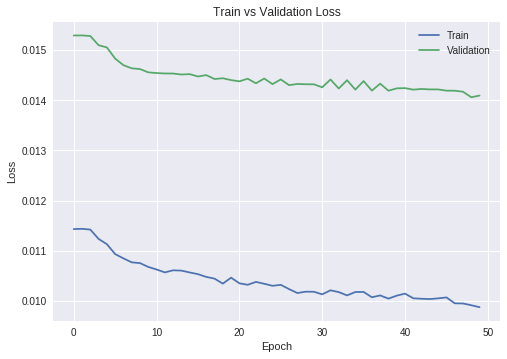

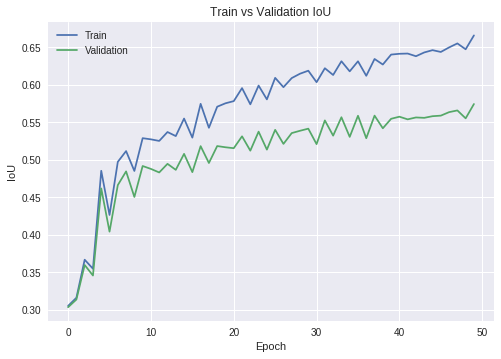

In [4]:
# Train model
net = extractNet_connected_vgg11_bn()
trainModel(net, train, valid, batch_size=batch_size, num_epochs=50, checkpoint=True)

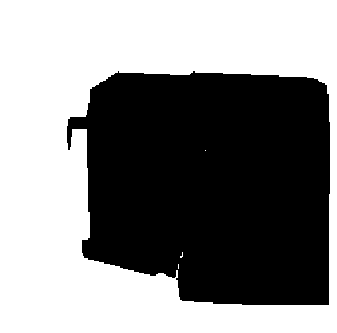

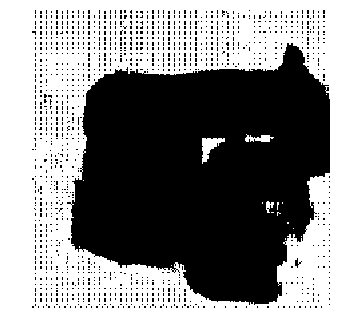

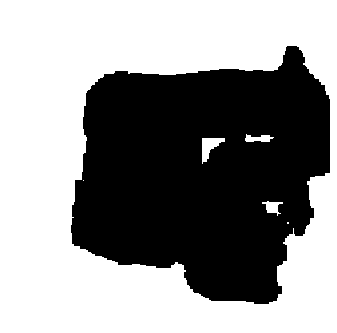

<Figure size 576x396 with 0 Axes>

In [5]:
# After training (train set)
img, target = train_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(target)
imshow(out)
imshow(denoised)

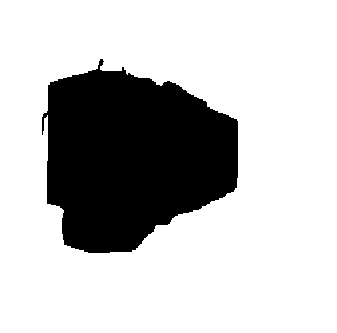

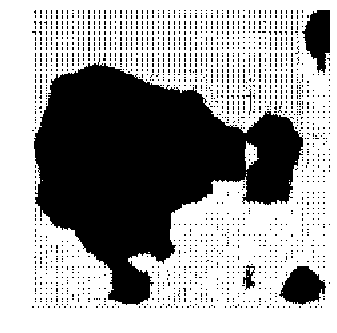

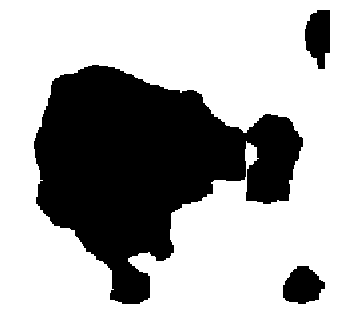

<Figure size 576x396 with 0 Axes>

In [6]:
# After training (validation set)
img, target = valid_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(target)
imshow(out)
imshow(denoised)